# Neutrino Oscillation: Animations

Authors: Lodovico, Lewis<br>
Last Update: 07/02

# Introduction
In this notebook, the mathematics of the neutrino oscillation has been implemented, with the resulting functions being used to visually depict this phenomenon with vpython. This is initially applied to the two-flavour case and is eventually extended to three flavours. The oscillation is displayed with the neutrino moving through its 'mass eigenstate space' as a function of time, with the probability being represented by the colour of the sphere (red for electron, green for muon and blue for tau neutrino). 

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import tkinter as tk
from IPython.display import Image # needed to import a remote image later

<IPython.core.display.Javascript object>

# Defining Constants

In [3]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta_CP = np.radians(222)

# mass differences
dm21_sq = 7.53*10**(-5) # eV^2
dm32_sq = 2.52*10**(-3) # eV^2

# mass eigenstates
m1 = 0.75 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m2*m2 + dm32_sq) # eV

#calculate third mass difference squared
dm31_sq = m3*m3 - m1*m1 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
# note: add energy values from other reactions, e.g. atmospheric, nuclear reactor

# important constants:
# speed of light
c = 299792.458 # km s^-1 
# Planck constant
hbar = 6.582119569*10**(-16) # eV*s
# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

# The Two Flavour Case

The following defines the orthogonal basis vectors for mass eigenstates $m_1$ and $m_2$, the 2D rotation matrix, $U$ and describes how this is used to trtansform the mass eigenvectors to the flavour eigenvectors. The time independent states are then plotted for an arbitrary theta. 

<IPython.core.display.Javascript object>


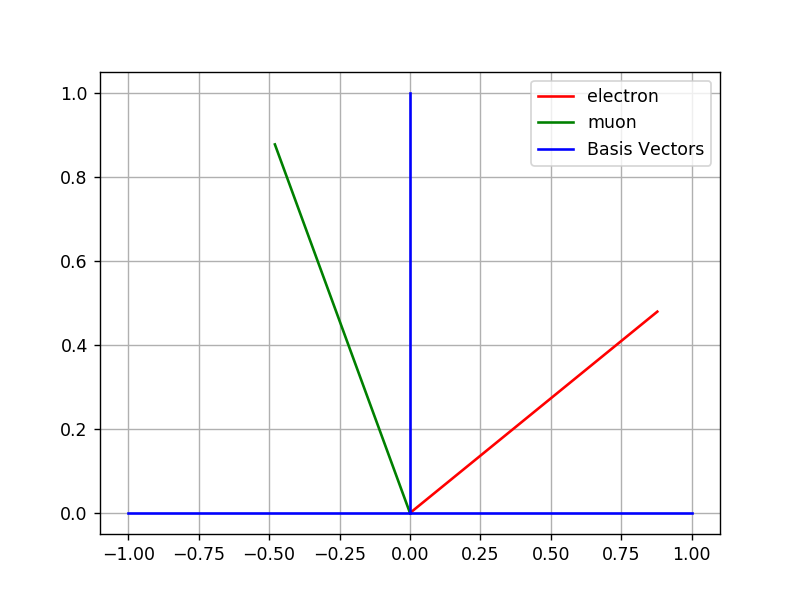

In [4]:
theta=0.5#Mixing Angle
v1=np.array([[1],[0]])#mass1 basis vector
v2=np.array([[0],[1]])#mass2 basis vector
U= np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])#Rotation Matrix
vv=np.array([[v1],[v2]])#Vector of basis vectors 

V = U.dot(vv)# Vector of each flavour in the mass basis

#Plotting flavours for t=0  
plt.figure()
plt.grid(True)

l1=([0,V[0,0]])
l2=([0,V[0,1]])
l3=([0,V[1,0]])
l4=([0,V[1,1]])
plt.plot(l1,l2,'r-',label='electron')
plt.plot(l3,l4,'g-',label='muon')
plt.plot([-1,1],[0,0],'b-',label='Basis Vectors')
plt.plot([0,0],[0,1],'b-')
plt.legend()


In [5]:
#Time Dependence(hbar set to 1)
t=np.linspace(0,50,1000)
E1=2
E2=5
Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
Tr= Ut.dot(vv)

#P=((np.sin(2*theta))**2)*np.sin((E1-E2)*t/2)
print(t[0])

0.0


## Starting with an electron neutrino

In [ ]:
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow

scene= canvas(background=color.white)

# first set up the objects:
pivot1 = vector(-1,0,0) # pivot point at centre of display


# ...and the bob.
e_neutrino = sphere(pos=vector(Tr[0,0],Tr[0,1],0), 
                      radius = 0.1, color=color.black, make_trail=True, retain=20)

N=100
# Loop for electron neutrino 
for i in range(0,N):
    
   
    ## first system:
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
    Tr= Ut.dot(vv)
    
    xpos=Tr[0,0]
    ypos=Tr[0,1]
    
    e_neutrino.pos= vector(xpos,ypos,0)
    
    #axes
    rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
    P=((np.sin(2*theta))**2)*np.sin((E1-E2)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
    e_neutrino.color= vector(1-abs(P),abs(P),0)#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
    rate(5) # max number of screen updates per second
    #print(bob.color)

## Rotation of the flavour vector (electron at the beginning)

In [ ]:
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow

scene= canvas(background=color.white)

# first set up the objects:
pivot1 = vector(-1,0,0) # pivot point at centre of display

rod1 = arrow(pos=vector(0,0,0), axis = vector(V[0,0],V[0,1],0),width=0.05, color=color.red)#Position of the e.n. flavour vector
rod2=  cylinder(pos=vector(0,0,0), axis = vector(V[1,0],V[1,1],0),radius=0.005, color=color.green)

N=100
# Loop for electron neutrino 
for i in range(0,N):
    
   
    ## first system:
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
    Tr= Ut.dot(vv)
    
    xpos=Tr[0,0]
    ypos=Tr[0,1]
    
    rod1.axis=vector(xpos,ypos,0)
    
    #axes
    rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.black)
    rod = cylinder(pos=vector(0,-0.75,0), axis = vector(0,1.5,0), 
                      radius = 0.01, color=color.black)
    rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.black)
    rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.black)
    

                   
    P=((np.sin(2*theta))**2)*(np.sin((E1-E2)*t[i]/2))**2#Probability that an electron neutrino turns into a muon neutrino
    rod1.color= vector(1-abs(P),abs(P),0)#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
    rate(5) # max number of screen updates per second
    #print(bob.color)

## Starting with a muon neutrino

In [ ]:
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow

scene= canvas(background=color.white)

# first set up the objects:
pivot1 = vector(-1,0,0) # pivot point at centre of display


# ...and the bob.
m_neutrino = sphere(pos=vector(Tr[1,0],Tr[1,1],0), 
                      radius = 0.1, color=color.black, make_trail=True)

N=100
# Loop for electron neutrino 
for i in range(0,N):
    
   
    ## first system:
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
    Tr= Ut.dot(vv)
    
    xpos=Tr[1,0]
    ypos=Tr[1,1]
    
    m_neutrino.pos= vector(xpos,ypos,0)
    
    #axes
    rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
    Pm=((np.sin(2*theta))**2)*(np.sin(-(E1-E2)*t[i]/2))**2#Probability that a muon neutrino turns into an electron neutrino
    m_neutrino.color= vector(abs(Pm),1-abs(Pm),0)#red= probability of  transforming. Redder= more likely to remain an electron neutrino.
    
   
    rate(5) # max number of screen updates per second
    #print(m_neutrino.color)

## Defining Functions for each animation

In [ ]:
def electron(theta,E1,E2):
    """
    A function that executes the two flavour neutrino oscillation starting from ve
    """
    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
    Tr= Ut.dot(vv)

    # ...and the bob.
    e_neutrino = sphere(pos=vector(Tr[0,0],Tr[0,1],0), 
                      radius = 0.1, color=color.black, make_trail=True)

    N=100
    # Loop for electron neutrino 
    


    for i in range(0,N):
    
   
        ## first system:
        Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
        Tr= Ut.dot(vv)
    
        xpos=Tr[0,0]
        ypos=Tr[0,1]
    
        e_neutrino.pos= vector(xpos,ypos,0)
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
        P=((np.sin(2*theta))**2)*np.sin((E1-E2)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        e_neutrino.color= vector(1-abs(P),abs(P),0)#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(5) # max number of screen updates per second
        #print(bob.color)

In [ ]:
def muon(theta,E1,E2):
    """
    A function that executes the two flavour neutrino oscillation starting from vm
    """
    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
    Tr= Ut.dot(vv)

    # ...and the bob.
    m_neutrino = sphere(pos=vector(Tr[1,0],Tr[1,1],0), 
                      radius = 0.1, color=color.black, make_trail=True)

    N=100
    
    for i in range(0,N):
    
   
        ## first system:
        Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
        Tr= Ut.dot(vv)
    
        xpos=Tr[1,0]
        ypos=Tr[1,1]
    
        m_neutrino.pos= vector(xpos,ypos,0)
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
        Pm=((np.sin(2*theta))**2)*(np.sin(-(E1-E2)*t[i]/2))**2#Probability that a muon neutrino turns into an electron neutrino
        m_neutrino.color= vector(abs(Pm),1-abs(Pm),0)#red= probability of  transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(5) # max number of screen updates per second
        #print(m_neutrino.color)

# Input Dependent Animation

In [ ]:
theta= float(input("Input Mixing Angle"))
E1= float(input("Input mass 1 energy"))
E2= float(input("Input Mass 2 energy"))
f= (input("Input flavour:"))
if f in ['e','E','electron','Electron']:
    print("Initially electron neutrino" )
    electron(theta,E1,E2)
if f in ['m','M','Mu','MU','mu','Muon','muon'] :
    print("Initially muon neutrino" )
    muon(theta,E1,E2)
else:
        print('End')

# Three Flavour Case

## The Transformation matrix, U

In [6]:
###TRANSFORMATION MATRIX###
th13=45
th23=45
th12=45
delta=3

u_atm=np.array([[1,0,0],[0,np.cos(th23),np.sin(th23)],[0,-np.sin(th23),np.cos(th23)]])#Atmospheric Contribution
u_cross=np.array([[np.cos(th13),0,np.sin(th13)*np.exp(complex(0,delta))],[0,1,0],[-np.sin(th13)*np.exp(complex(0,delta)),0,np.cos(th13)]])#Cross mixing matrix
u_solar=np.array([[np.cos(th12),np.sin(th12),0],[-np.sin(th12),np.cos(th12),0],[0,0,1]])#Solar contribution

cs=u_cross.dot(u_solar)#cross x solar matrix multiplication

U_tot=u_atm.dot(cs)# Full transformation matrix



vt1=np.array([[1],[0],[0]])#mass1 basis vector
vt2=np.array([[0],[1],[0]])#mass2 basis vector
vt3=np.array([[0],[0],[1]])#mass3 basis vector

Vfull=np.array([[vt1],[vt2],[vt3]])#Vector of basis vectors 

v_3f= U_tot.dot(Vfull)#Transforming Mass Basis to Flavour Basis

v3r= v_3f.real# real part of flavour vectors
#print(v3r)






#In Lodovico's terms
# mass eigenstates vector
mar_3f = np.array([m1, m2, m3]) 

#rotational matrix
U1 = np.array([[1, 0, 0], [0, np.cos(th23), np.sin(th23)], [0, -np.sin(th23), np.cos(th23)]]) #first matrix
U2 = np.array([[np.cos(th13), 0, np.sin(th13)*np.exp(-1j*delta_CP)], [0, 1, 0], 
               [-np.sin(th13)*np.exp(1j*delta_CP), 0, np.cos(th13)]]) #second matrix
U3 = np.array([[np.cos(th12), np.sin(th12), 0], [np.sin(th12), np.cos(th12), 0], [0, 0, 1]]) #third matrix
rot_mat_3f = np.dot(U1, np.dot(U2, U3)) #final matrix

<IPython.core.display.Javascript object>


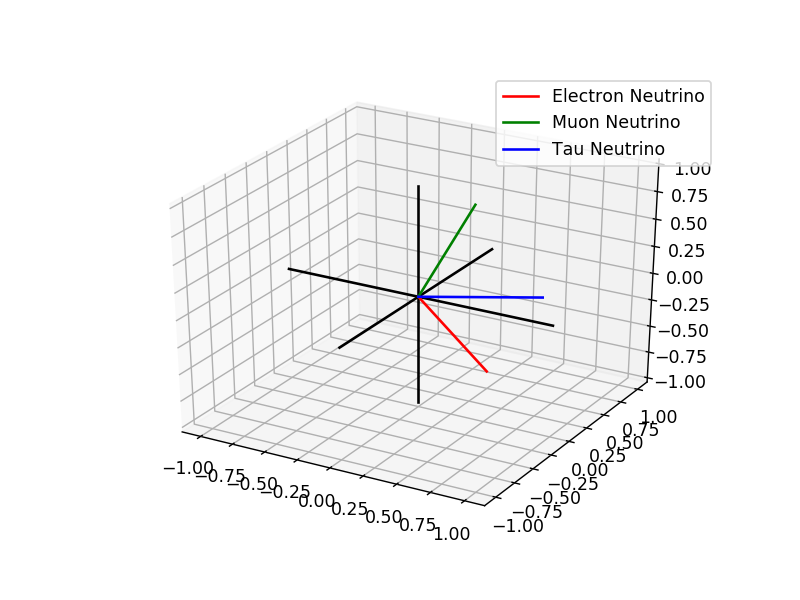

In [7]:
###PLOTTING BASES AND FLAVOUR VECTORS###

fig=plt.figure()
ax= fig.gca(projection='3d')
ax.plot(xs=[-1,1],ys=[0,0],zs=[0,0], color='k')
ax.plot(xs=[0,0],ys=[1,-1],zs=[0,0],color='k')
ax.plot(xs=[0,0],ys=[0,0],zs=[1,-1],color='k')

#Electron Neutrino coordinates
x1=([0,v3r[0,0,0,0]])
y1=([0,v3r[0,1,0,0]])
z1=([0,v3r[0,2,0,0]])

#Muon Neutrino Coordinates
x2=([0,v3r[1,0,0,0]])
y2=([0,v3r[1,1,0,0]])
z2=([0,v3r[1,2,0,0]])

#Tau Neutrino Coordinates
x3=([0,v3r[2,0,0,0]])
y3=([0,v3r[2,1,0,0]])
z3=([0,v3r[2,2,0,0]])

ax.plot(xs=x1,ys=y1,zs=z1,color='r',label='Electron Neutrino')
ax.plot(xs=x2,ys=y2,zs=z2,color='g',label='Muon Neutrino')
ax.plot(xs=x3,ys=y3,zs=z3,color='b',label='Tau Neutrino')
plt.legend()

In [8]:
###Time Dependence###
E3=5.1
VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

VTF=U_tot.dot(VFULL)#Time Dependent Transformation
VTFR= VTF.real



## Starting with an Electron neutrino

In [9]:
def E_3():
    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    E3=5.1
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real

    # ...and the bob.
    e_neutrino2 = sphere(pos=vector(VTFR[0,0,0,0],VTFR[0,1,0,0],VTFR[0,2,0,0]), 
                      radius = 0.1, color=color.black, make_trail=True, retain=50)
    scene.camera.pos=vector(1.5,0.5,1.73205)
    scene.camera.axis=-scene.camera.pos
    N=300
    # Loop for electron neutrino 
    for i in range(0,N):
    
   
        ## first system:
        VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
        VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
        VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

        VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

        VTF=U_tot.dot(VFULL)#Time Dependent Transformation
        VTFR= VTF.real
    
        xpos=VTFR[0,0,0,0]
        ypos=VTFR[0,1,0,0]
        zpos=VTFR[0,2,0,0]
    
        e_neutrino2.pos= vector(xpos,ypos,zpos)
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
        Pem=((np.sin(2*theta))**2)*np.sin((E1-E2)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        Pet=((np.sin(2*theta))**2)*np.sin((E1-E3)*t[i]/2)#Probability that an electron neutrino turns into a tau neutrino
        e_neutrino2.color= vector(1-abs(Pem)-abs(Pet),abs(Pem),abs(Pet))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(5) # max number of screen updates per second
        #print(bob.color)


# Starting from Muon Neutrino

In [10]:
def M_3():

    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    
    E3=5.1
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real

    # ...and the bob.
    m_neutrino2 = sphere(pos=vector(VTFR[1,0,0,0],VTFR[1,1,0,0],VTFR[1,2,0,0]), 
                      radius = 0.1, color=color.black, make_trail=True, retain=50)
    scene.camera.pos=vector(1.5,0.5,1.73205)
    scene.camera.axis=-scene.camera.pos
    N=300
    # Loop for electron neutrino 
    for i in range(0,N):
    
   
        ## first system:
        VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
        VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
        VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

        VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

        VTF=U_tot.dot(VFULL)#Time Dependent Transformation
        VTFR= VTF.real
    
        xpos=VTFR[1,0,0,0]
        ypos=VTFR[1,1,0,0]
        zpos=VTFR[1,2,0,0]
    
        m_neutrino2.pos= vector(xpos,ypos,zpos)
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
        Pme=((np.sin(2*theta))**2)*np.sin((E2-E1)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        Pmt=((np.sin(2*theta))**2)*np.sin((E2-E3)*t[i]/2)
        m_neutrino2.color= vector(abs(Pme),1-abs(Pme)-abs(Pmt),abs(Pmt))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(10) # max number of screen updates per second
        #print(bob.color)


# Starting with a Tau Neutrino

In [11]:
def T_3():

    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    E3=5.1
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real

    # ...and the bob.
    t_neutrino2 = sphere(pos=vector(VTFR[2,0,0,0],VTFR[2,1,0,0],VTFR[2,2,0,0]), 
                      radius = 0.1, color=color.black, make_trail=True)
    scene.camera.pos=vector(1.5,0.5,1.73205)
    scene.camera.axis=-scene.camera.pos
    N=300
    # Loop for electron neutrino 
    for i in range(0,N):
    
   
        ## first system:
        VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
        VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
        VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

        VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

        VTF=U_tot.dot(VFULL)#Time Dependent Transformation
        VTFR= VTF.real
    
        xpos=VTFR[2,0,0,0]
        ypos=VTFR[2,1,0,0]
        zpos=VTFR[2,2,0,0]
    
        t_neutrino2.pos= vector(xpos,ypos,zpos)
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
        Pte=((np.sin(2*theta))**2)*np.sin((E3-E1)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        Ptm=((np.sin(2*theta))**2)*np.sin((E3-E2)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        t_neutrino2.color= vector(abs(Pte),abs(Ptm),1-abs(Pte)-abs(Ptm))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(5) # max number of screen updates per second
        #print(bob.color)


# Run with Text Input

In [ ]:
f= (input("Input flavour:"))
if f in ['e','E','electron','Electron']:
    print("Initially electron neutrino" )
    E_3()
if f in ['m','M','Mu','MU','mu','Muon','muon'] :
    print("Initially muon neutrino" )
    M_3()
if f in ['t','T','Tau','TAU','tau'] :
    print("Initially tau neutrino" )
    T_3()
else:
        print('End')

# Run with Button Input

In [12]:
root = tk.Tk()
frame = tk.Frame(root)
frame.pack()

buttone = tk.Button(frame, 
                   text="Electron", 
                   fg="red",
                   command=E_3)
buttone.pack(side=tk.LEFT)
buttonm = tk.Button(frame,
                   text="Muon",
                   fg="green",
                   command = M_3)
buttonm.pack(side=tk.LEFT)
buttonm = tk.Button(frame,
                   text="Tau",
                   fg="blue",
                   command = T_3)
buttonm.pack(side=tk.LEFT)
button = tk.Button(frame, 
                   text="QUIT", 
                   fg="black",
                   command=quit)
button.pack(side=tk.LEFT)

root.mainloop()